<a href="https://colab.research.google.com/github/Gehlen05/mestrado-automacao/blob/main/csp-trabalho/CSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-constraint2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.0 MB/s eta 0:00:00


#Problema 1

In [ ]:
from constraint import Problem, AllDifferentConstraint
from itertools import combinations

# Sessões e posições disponíveis (12: 3 salas × 4 turnos)
sessoes = list("ABCDEFGHIJK")
posicoes = list(range(12))  # 0 a 11 → D1M S1~S3, D1T S1~S3, D2M S1~S3, D2T S1~S3

# Mapeia posição para turno
def turno(pos): return pos // 3  # 0=D1M, 1=D1T, 2=D2M, 3=D2T

# Inicia o problema
p = Problem()
p.addVariables(sessoes, posicoes)
p.addConstraint(AllDifferentConstraint())  # cada sessão em uma posição única

# Conflitos (não podem estar no mesmo turno)
conflitos = [
    ["A", "J"], ["J", "I"], ["I", "E"], ["C", "F"], ["F", "G"],
    ["D", "H"], ["B", "D"], ["K", "E"],
    ["B", "I", "H", "G"], ["A", "G", "E"], ["B", "H", "K"], ["A", "B", "C", "H"], ["D", "F", "J"]
]
for grupo in conflitos:
    for a, b in combinations(grupo, 2):
        p.addConstraint(lambda x, y: turno(x) != turno(y), (a, b))

# Precedência
p.addConstraint(lambda e, j: turno(e) < turno(j), ("E", "J"))
p.addConstraint(lambda d, k: turno(d) < turno(k), ("D", "K"))
p.addConstraint(lambda f, k: turno(f) < turno(k), ("F", "K"))

# Fixar sessão A no início (D1M: posições 0,1,2) e J no fim (D2T: 9,10,11)
p.addConstraint(lambda a: a in [0,1,2], ("A",))
p.addConstraint(lambda j: j in [9,10,11], ("J",))

# Apenas 2 sessões na tarde do segundo dia (turno 3: pos 9-11)
def duas_em_D2T(*args):
    return sum(1 for v in args if 9 <= v <= 11) == 2
p.addConstraint(duas_em_D2T, sessoes)

# Resolver e mostrar
sol = p.getSolution()
if sol:
    for s in sorted(sol, key=lambda x: sol[x]):
        t = ["D1M", "D1T", "D2M", "D2T"][sol[s] // 3]
        sala = ["S1", "S2", "S3"][sol[s] % 3]
        print(f"Sessão {s}: {t}, {sala}")
else:
    print(" Nenhuma solução encontrada.")


Sessão D: D1M, S1
Sessão I: D1M, S2
Sessão A: D1M, S3
Sessão F: D1T, S1
Sessão E: D1T, S2
Sessão H: D1T, S3
Sessão C: D2M, S1
Sessão K: D2M, S2
Sessão G: D2M, S3
Sessão J: D2T, S2
Sessão B: D2T, S3


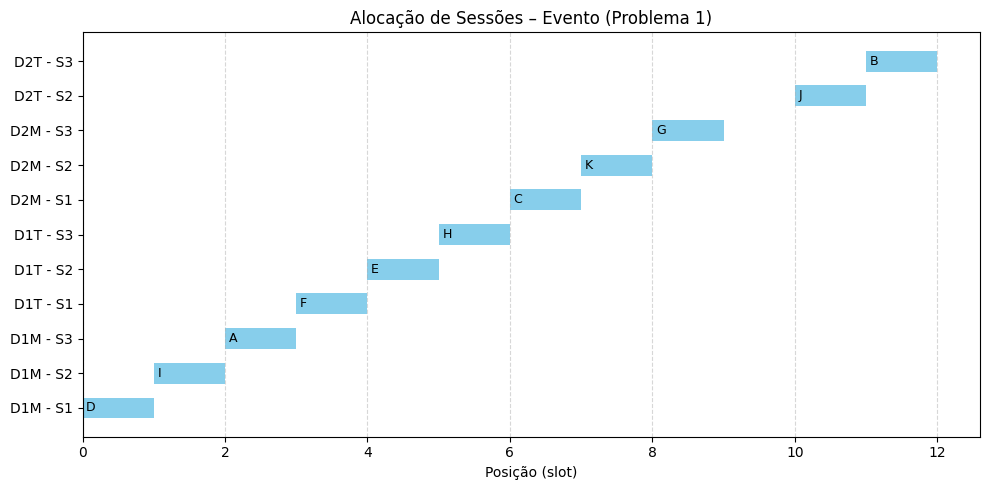

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

turnos = ["D1M", "D1T", "D2M", "D2T"]
salas = ["S1", "S2", "S3"]

dados = []
for sessao, pos in sol.items():
    turno = pos // 3
    sala = pos % 3
    dados.append((sessao, turnos[turno], salas[sala], pos))

df = pd.DataFrame(dados, columns=["Sessão", "Turno", "Sala", "Slot"])
df = df.sort_values(by="Slot")

fig, ax = plt.subplots(figsize=(10, 5))
for _, row in df.iterrows():
    y = f"{row['Turno']} - {row['Sala']}"
    ax.barh(y, 1, left=row["Slot"], height=0.6, color="skyblue")
    ax.text(row["Slot"] + 0.05, y, row["Sessão"], va='center', ha='left', fontsize=9)

ax.set_title("Alocação de Sessões – Evento (Problema 1)")
ax.set_xlabel("Posição (slot)")
#ax.set_yticks([])
ax.grid(True, axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("gantt_evento_problema1.png", dpi=300)
plt.show()

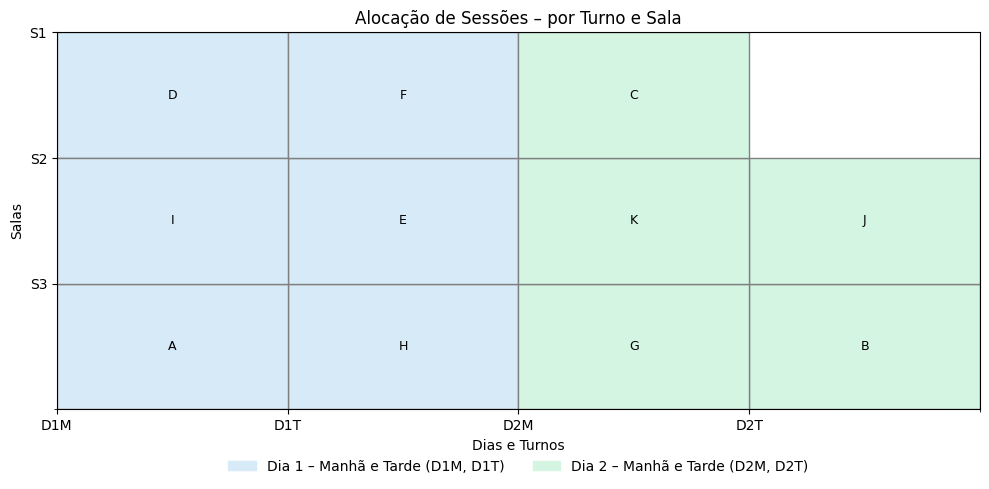

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

turnos = ["D1M", "D1T", "D2M", "D2T"]
salas = ["S1", "S2", "S3"]

# Exemplo se precisar testar:
# sol = {"Sessão A": 0, "Sessão B": 4, "Sessão C": 8, "Sessão D": 2, "Sessão E": 10}

dados = []
for sessao, pos in sol.items():
    turno_idx = pos // 3
    sala_idx = pos % 3
    dados.append((sessao, turnos[turno_idx], salas[sala_idx], turno_idx, sala_idx))

df = pd.DataFrame(dados, columns=["Sessão", "Turno", "Sala", "Turno_idx", "Sala_idx"])

fig, ax = plt.subplots(figsize=(10, 5))

# Cores pastel por dia
cores = {
    "D1M": "#D6EAF8",  # azul claro
    "D1T": "#D6EAF8",
    "D2M": "#D5F5E3",  # verde claro
    "D2T": "#D5F5E3"
}

for _, row in df.iterrows():
    x = row["Turno_idx"]
    y = row["Sala_idx"]
    cor = cores[row["Turno"]]
    rect = patches.Rectangle((x, y), 1, 1, edgecolor='gray', facecolor=cor, linewidth=1)
    ax.add_patch(rect)
    ax.text(x + 0.5, y + 0.5, row["Sessão"], ha='center', va='center', fontsize=9)

# Eixos
ax.set_xticks(range(len(turnos)))
ax.set_xticklabels(turnos, fontsize=10)
ax.set_yticks(range(len(salas)))
ax.set_yticklabels(salas, fontsize=10)
ax.set_xlim(0, len(turnos))
ax.set_ylim(0, len(salas))
ax.set_xlabel("Dias e Turnos")
ax.set_ylabel("Salas")
ax.set_title("Alocação de Sessões – por Turno e Sala", fontsize=12)
ax.invert_yaxis()

# Grade leve
ax.set_xticks([x for x in range(len(turnos) + 1)], minor=True)
ax.set_yticks([y for y in range(len(salas) + 1)], minor=True)
ax.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)

# Legenda manual
legend_patches = [
    patches.Patch(color="#D6EAF8", label="Dia 1 – Manhã e Tarde (D1M, D1T)"),
    patches.Patch(color="#D5F5E3", label="Dia 2 – Manhã e Tarde (D2M, D2T)")
]
ax.legend(handles=legend_patches, loc='upper center', bbox_to_anchor=(0.5, -0.1),
          ncol=2, frameon=False)

plt.tight_layout()
plt.show()


#Problema 2

In [ ]:
from constraint import Problem
from itertools import combinations

# Dados dos jobs
job_data = {
    0: [(1, 72), (0, 87), (4, 95), (2, 66), (3, 60)],
    1: [(4, 5), (3, 35), (0, 48), (2, 39), (1, 54)],
}
num_jobs = len(job_data)
num_tasks = len(job_data[0])

# Estimativa de horizonte máximo (soma de todas durações)
horizon = sum(d for job in job_data.values() for (_, d) in job)

# Cria CSP
p = Problem()

# Cada tarefa é representada por (job, task)
# Vamos associar a ela uma variável: o tempo de início
for j in range(num_jobs):
    for t in range(num_tasks):
        p.addVariable((j, t), list(range(horizon)))  # início entre 0 e horizonte

# 1. Respeitar ordem das tarefas no mesmo job
for j in range(num_jobs):
    for t in range(num_tasks - 1):
        dur = job_data[j][t][1]
        p.addConstraint(lambda a, b, d=dur: a + d <= b, [(j, t), (j, t + 1)])

# 2. Respeitar exclusividade da máquina
# Para cada par de tarefas em máquinas iguais
for (j1, t1), (j2, t2) in combinations([(j, t) for j in range(num_jobs) for t in range(num_tasks)], 2):
    m1, d1 = job_data[j1][t1]
    m2, d2 = job_data[j2][t2]
    if m1 == m2:
        # tarefas (j1,t1) e (j2,t2) não podem se sobrepor
        def not_overlap(a, b, d1=d1, d2=d2):
            return a + d1 <= b or b + d2 <= a
        p.addConstraint(not_overlap, [(j1, t1), (j2, t2)])

# Solução
solution = p.getSolution()

# Mostrar
if solution:
    tarefas = sorted(solution.items(), key=lambda x: x[1])
    for (j, t), inicio in tarefas:
        m, d = job_data[j][t]
        print(f"Job {j} Tarefa {t} → Máquina {m}, Início {inicio}, Fim {inicio + d}")
else:
    print("❌ Nenhuma solução encontrada.")


Job 0 Tarefa 0 → Máquina 1, Início 240, Fim 312
Job 0 Tarefa 1 → Máquina 0, Início 312, Fim 399
Job 1 Tarefa 0 → Máquina 4, Início 367, Fim 372
Job 1 Tarefa 1 → Máquina 3, Início 372, Fim 407
Job 0 Tarefa 2 → Máquina 4, Início 399, Fim 494
Job 1 Tarefa 2 → Máquina 0, Início 407, Fim 455
Job 1 Tarefa 3 → Máquina 2, Início 455, Fim 494
Job 0 Tarefa 3 → Máquina 2, Início 494, Fim 560
Job 0 Tarefa 4 → Máquina 3, Início 560, Fim 620
Job 1 Tarefa 4 → Máquina 1, Início 560, Fim 614


In [ ]:
from constraint import Problem
from itertools import combinations

# --- Dados completos (Lawrence 10x5) ---
job_data = {
    0: [(1, 72), (0, 87), (4, 95), (2, 66), (3, 60)],
    1: [(4, 5), (3, 35), (0, 48), (2, 39), (1, 54)],
    # 2: [(1, 46), (3, 20), (2, 21), (0, 97), (4, 55)],
    # 3: [(0, 59), (3, 19), (1, 33), (2, 27), (4, 71)],
    # 4: [(4, 23), (2, 73), (3, 25), (1, 24), (0, 28)],
    # 5: [(3, 28), (0, 45), (1, 51), (4, 78), (2, 83)],
    # 6: [(0, 53), (3, 71), (1, 37), (4, 29), (2, 85)],
    # 7: [(4, 12), (2, 87), (3, 33), (0, 55), (1, 40)],
    # 8: [(2, 49), (3, 83), (4, 45), (0, 34), (1, 30)],
    # 9: [(2, 65), (3, 17), (0, 90), (4, 27), (1, 23)],
}

num_jobs = len(job_data)
num_tasks = len(job_data[0])
horizon = sum(d for job in job_data.values() for (_, d) in job)

problem = Problem()

# Variáveis: tempo de início de cada tarefa
for j in range(num_jobs):
    for t in range(num_tasks):
        var = f"J{j}T{t}"
        problem.addVariable(var, range(horizon))

# Ordem das tarefas dentro de cada job
for j in range(num_jobs):
    for t in range(num_tasks - 1):
        dur = job_data[j][t][1]
        problem.addConstraint(lambda a, b, d=dur: a + d <= b, (f"J{j}T{t}", f"J{j}T{t+1}"))

# Evitar sobreposição em cada máquina
maquinas = {m: [] for m in range(5)}
for j in range(num_jobs):
    for t, (m, d) in enumerate(job_data[j]):
        maquinas[m].append((f"J{j}T{t}", d))

for m, tarefas in maquinas.items():
    for (a, da), (b, db) in combinations(tarefas, 2):
        problem.addConstraint(lambda x, y, da=da, db=db: x + da <= y or y + db <= x, (a, b))

# Resolver
sol = problem.getSolution()
if sol:
    resultado = []
    for j in range(num_jobs):
        for t in range(num_tasks):
            var = f"J{j}T{t}"
            m, d = job_data[j][t]
            inicio = sol[var]
            resultado.append((inicio, f"Job {j} T{t}", f"M{m}", f"{inicio}-{inicio+d}"))
    for r in sorted(resultado):
        print(f"{r[1]:12} | {r[2]} | {r[3]}")
else:
    print(" Nenhuma solução encontrada.")


Job 0 T0     | M1 | 240-312
Job 0 T1     | M0 | 312-399
Job 1 T0     | M4 | 367-372
Job 1 T1     | M3 | 372-407
Job 0 T2     | M4 | 399-494
Job 1 T2     | M0 | 407-455
Job 1 T3     | M2 | 455-494
Job 0 T3     | M2 | 494-560
Job 0 T4     | M3 | 560-620
Job 1 T4     | M1 | 560-614


In [ ]:
!pip install ortools
!pip install matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [ ]:
from ortools.sat.python import cp_model
import pandas as pd
import matplotlib.pyplot as plt

# Dados: 10 jobs × 5 tarefas cada
job_data = [
    [(1, 72), (0, 87), (4, 95), (2, 66), (3, 60)],
    [(4, 5), (3, 35), (0, 48), (2, 39), (1, 54)],
    [(1, 46), (3, 20), (2, 21), (0, 97), (4, 55)],
    [(0, 59), (3, 19), (1, 33), (2, 27), (4, 71)],
    [(4, 23), (2, 73), (3, 25), (1, 24), (0, 28)],
    [(3, 28), (0, 45), (1, 51), (4, 78), (2, 83)],
    [(0, 53), (3, 71), (1, 37), (4, 29), (2, 85)],
    [(4, 12), (2, 87), (3, 33), (0, 55), (1, 40)],
    [(2, 49), (3, 83), (4, 45), (0, 34), (1, 30)],
    [(2, 65), (3, 17), (0, 90), (4, 27), (1, 23)],
]

# Preparar modelo
model = cp_model.CpModel()
horizon = sum(task[1] for job in job_data for task in job)
task_vars = {}
machine_to_intervals = {m: [] for m in range(5)}

# Criar variáveis
for j, job in enumerate(job_data):
    for t, (m, d) in enumerate(job):
        start = model.NewIntVar(0, horizon, f'start_{j}_{t}')
        end = model.NewIntVar(0, horizon, f'end_{j}_{t}')
        interval = model.NewIntervalVar(start, d, end, f'interval_{j}_{t}')
        task_vars[(j, t)] = (start, end, interval, m, d)
        machine_to_intervals[m].append(interval)

# Restrições de precedência no mesmo job
for j in range(len(job_data)):
    for t in range(len(job_data[0]) - 1):
        model.Add(task_vars[(j, t + 1)][0] >= task_vars[(j, t)][1])

# Restrições de exclusividade da máquina
for m in machine_to_intervals:
    model.AddNoOverlap(machine_to_intervals[m])

# Minimizar o tempo total (makespan)
makespan = model.NewIntVar(0, horizon, 'makespan')
model.AddMaxEquality(makespan, [task_vars[(j, 4)][1] for j in range(10)])
model.Minimize(makespan)

# Resolver
solver = cp_model.CpSolver()
status = solver.Solve(model)

# Mostrar resultado
if status in [cp_model.OPTIMAL, cp_model.FEASIBLE]:
    print(f"\n Makespan: {solver.ObjectiveValue()}")
    print(" Cronograma das tarefas:\n")
    tarefas = []
    for (j, t), (s, e, _, m, d) in task_vars.items():
        ini = solver.Value(s)
        fim = solver.Value(e)
        tarefas.append((ini, f"Job {j} T{t}", f"M{m}", f"{ini}–{fim}"))

    for ini, tarefa, maquina, tempo in sorted(tarefas):
        print(f"{tarefa:10} | {maquina} | {tempo}")
else:
    print(" Nenhuma solução encontrada.")


 Makespan: 598.0
 Cronograma das tarefas:

Job 0 T0   | M1 | 0–72
Job 1 T0   | M4 | 0–5
Job 6 T0   | M0 | 0–53
Job 9 T0   | M2 | 0–65
Job 1 T1   | M3 | 5–40
Job 4 T0   | M4 | 5–28
Job 7 T0   | M4 | 28–40
Job 1 T2   | M0 | 53–101
Job 6 T1   | M3 | 53–124
Job 7 T1   | M2 | 65–152
Job 2 T0   | M1 | 72–118
Job 0 T1   | M0 | 101–188
Job 5 T0   | M3 | 124–152
Job 6 T2   | M1 | 124–161
Job 1 T3   | M2 | 152–191
Job 7 T2   | M3 | 152–185
Job 6 T3   | M4 | 161–190
Job 9 T1   | M3 | 185–202
Job 5 T1   | M0 | 188–233
Job 0 T2   | M4 | 190–285
Job 1 T4   | M1 | 191–245
Job 6 T4   | M2 | 191–276
Job 2 T1   | M3 | 202–222
Job 3 T0   | M0 | 233–292
Job 5 T2   | M1 | 245–296
Job 8 T0   | M2 | 276–325
Job 3 T1   | M3 | 292–311
Job 9 T2   | M0 | 292–382
Job 5 T3   | M4 | 296–374
Job 3 T2   | M1 | 311–344
Job 0 T3   | M2 | 325–391
Job 8 T1   | M3 | 325–408
Job 7 T3   | M0 | 382–437
Job 9 T3   | M4 | 382–409
Job 2 T2   | M2 | 391–412
Job 0 T4   | M3 | 408–468
Job 8 T2   | M4 | 409–454
Job 9 T4   | M1 | 4

Makespan: 598.0


<ipython-input-10-2fb4681fe0b8>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", 10)


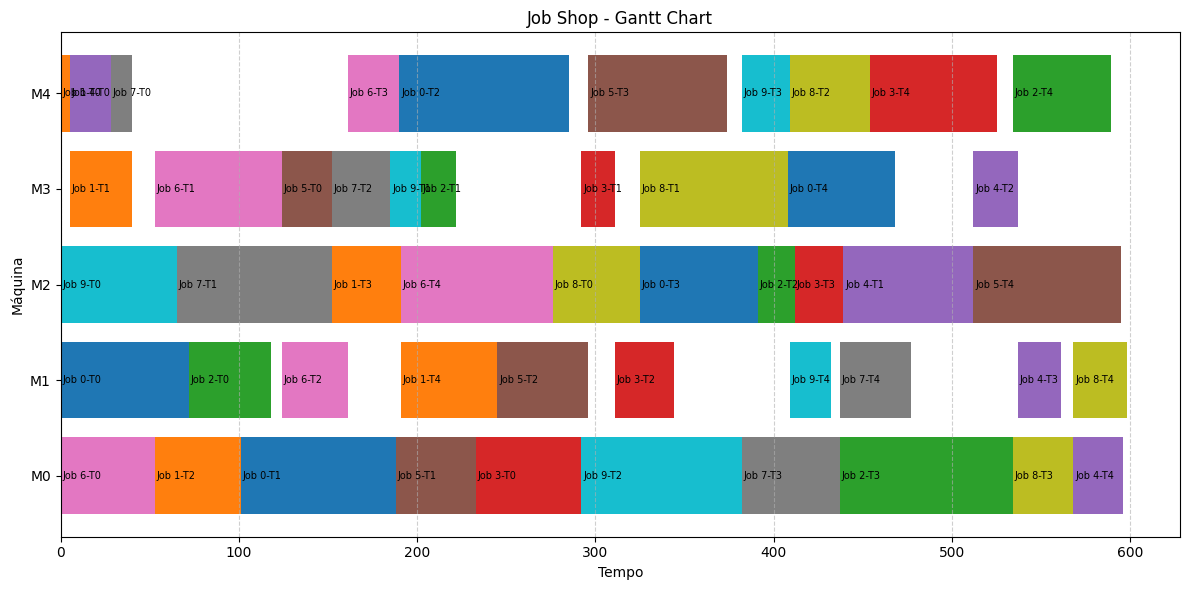

In [ ]:
# Mostrar resultado
if status in [cp_model.OPTIMAL, cp_model.FEASIBLE]:
    print(f"Makespan: {solver.ObjectiveValue()}")
    data = []
    for (j, t), (s, e, _, m, d) in task_vars.items():
        start_val = solver.Value(s)
        end_val = solver.Value(e)
        data.append((f"Job {j}", t, m, start_val, end_val, d))

    df = pd.DataFrame(data, columns=["Job", "Task", "Machine", "Start", "End", "Duration"])
    df = df.sort_values(by=["Machine", "Start"])

    # Gantt Chart
    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = plt.cm.get_cmap("tab10", 10)
    for _, row in df.iterrows():
        ax.barh(f"M{row.Machine}", row.Duration, left=row.Start, color=cmap(int(row.Job.split()[1])))
        ax.text(row.Start + 1, f"M{row.Machine}", f"{row.Job}-T{row.Task}", fontsize=7, va="center")
    ax.set_xlabel("Tempo")
    ax.set_ylabel("Máquina")
    ax.set_title("Job Shop - Gantt Chart")
    ax.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma solução encontrada.")



Makespan: 598.0


<ipython-input-27-299159a1f602>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", 10)


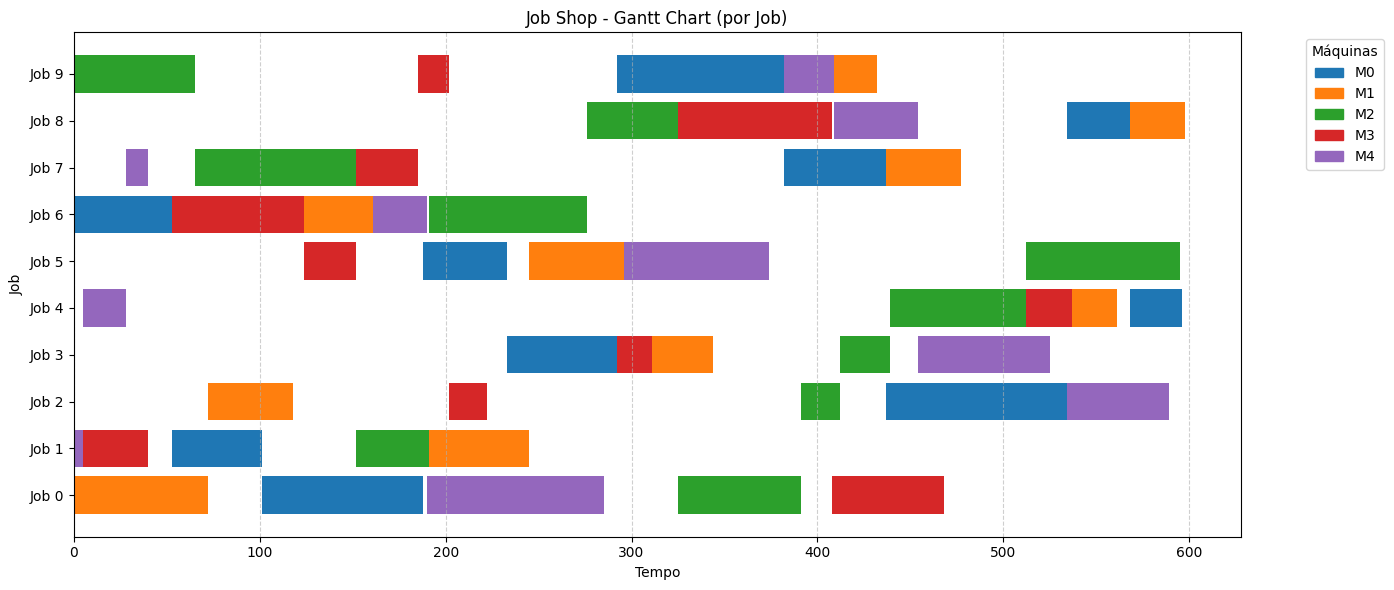

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.style.use("default")  # fundo branco
if status in [cp_model.OPTIMAL, cp_model.FEASIBLE]:
    print(f"Makespan: {solver.ObjectiveValue()}")
    data = []
    for (j, t), (s, e,_, m, d) in task_vars.items():
        start_val = solver.Value(s)
        end_val = solver.Value(e)
        data.append((f"Job {j}", t, m, start_val, end_val, d))

    df = pd.DataFrame(data, columns=["Job", "Task", "Machine", "Start", "End", "Duration"])
    df = df.sort_values(by=["Job", "Start"])

    fig, ax = plt.subplots(figsize=(14, 6))
    cmap = plt.cm.get_cmap("tab10", 10)
    machine_colors = {}

    for _, row in df.iterrows():
        machine_label = f"M{row.Machine}"
        color = cmap(row.Machine)
        machine_colors[machine_label] = color

        ax.barh(row.Job, row.Duration, left=row.Start, color=color)

    # Legenda por máquina
    legend_patches = [mpatches.Patch(color=color, label=machine)
                      for machine, color in sorted(machine_colors.items())]
    ax.legend(handles=legend_patches, title="Máquinas", bbox_to_anchor=(1.05, 1), loc='upper left')

    ax.set_xlabel("Tempo")
    ax.set_ylabel("Job")
    ax.set_title("Job Shop - Gantt Chart (por Job)")
    ax.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma solução encontrada.")


Makespan: 598.0


<ipython-input-22-0c45ac31dd87>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", 10)


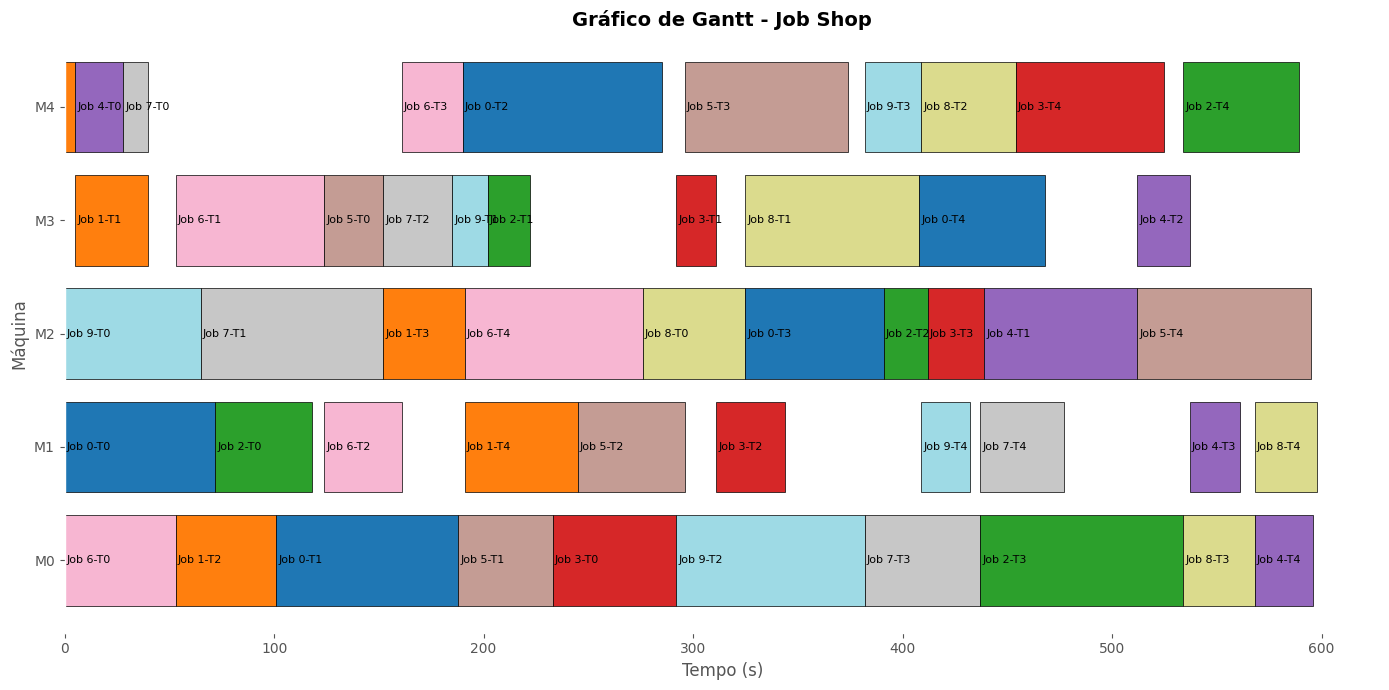

In [ ]:
# Mostrar resultado: Cores mais suaves
if status in [cp_model.OPTIMAL, cp_model.FEASIBLE]:
    print(f"Makespan: {solver.ObjectiveValue()}")
    data = []
    for (j, t), (s, e, _, m, d) in task_vars.items():
        start_val = solver.Value(s)
        end_val = solver.Value(e)
        data.append((f"Job {j}", t, m, start_val, end_val, d))

    df = pd.DataFrame(data, columns=["Job", "Task", "Machine", "Start", "End", "Duration"])
    df = df.sort_values(by=["Machine", "Start"])

 # Gantt Chart com melhorias
    plt.style.use("ggplot")
    fig, ax = plt.subplots(figsize=(14, 7), facecolor='white')
    ax.set_facecolor('white')

    cmap = plt.cm.get_cmap("tab20", 10)

    for _, row in df.iterrows():
        job_id = int(row.Job.split()[1])
        machine_label = f"M{row.Machine}"
        bar_color = cmap(job_id)

        ax.barh(machine_label, row.Duration, left=row.Start, color=bar_color,
                edgecolor='black', linewidth=0.5)

        # Só exibe texto se a barra for larga o suficiente
        if row.Duration > 10:
            ax.text(row.Start + 1, machine_label, f"{row.Job}-T{row.Task}",
                    fontsize=8, va="center", color='black')

    ax.set_xlabel("Tempo (s)", fontsize=12)
    ax.set_ylabel("Máquina", fontsize=12)
    ax.set_title("Gráfico de Gantt - Job Shop", fontsize=14, fontweight='bold')
    ax.grid(True, axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma solução encontrada.")

In [ ]:
from ortools.sat.python import cp_model

# Dados: (máquina, duração)
job_data = [
    [(1, 72), (0, 87), (4, 95), (2, 66), (3, 60)],
    [(4, 5), (3, 35), (0, 48), (2, 39), (1, 54)],
    [(1, 46), (3, 20), (2, 21), (0, 97), (4, 55)],
    [(0, 59), (3, 19), (1, 33), (2, 27), (4, 71)],
    [(4, 23), (2, 73), (3, 25), (1, 24), (0, 28)],
    [(3, 28), (0, 45), (1, 51), (4, 78), (2, 83)],
    [(0, 53), (3, 71), (1, 37), (4, 29), (2, 85)],
    [(4, 12), (2, 87), (3, 33), (0, 55), (1, 40)],
    [(2, 49), (3, 83), (4, 45), (0, 34), (1, 30)],
    [(2, 65), (3, 17), (0, 90), (4, 27), (1, 23)],
]

model = cp_model.CpModel()
horizon = sum(d for job in job_data for (_, d) in job)

task_vars = {}
machine_to_intervals = {m: [] for m in range(5)}

# Variáveis de início e intervalo
for j, job in enumerate(job_data):
    for t, (m, d) in enumerate(job):
        start = model.NewIntVar(0, horizon, f'start_{j}_{t}')
        end = model.NewIntVar(0, horizon, f'end_{j}_{t}')
        interval = model.NewIntervalVar(start, d, end, f'interval_{j}_{t}')
        task_vars[(j, t)] = (start, end, interval, m)
        machine_to_intervals[m].append(interval)

# Restrições: ordem dentro do job
for j in range(len(job_data)):
    for t in range(4):
        model.Add(task_vars[(j, t+1)][0] >= task_vars[(j, t)][1])

# Restrições: máquinas sem sobreposição
for m in machine_to_intervals:
    model.AddNoOverlap(machine_to_intervals[m])

# Resolver (sem função objetivo!)
solver = cp_model.CpSolver()
status = solver.Solve(model)

if status in [cp_model.OPTIMAL, cp_model.FEASIBLE]:
    print("✅ Solução viável encontrada:\n")
    for (j, t), (start, end, _, m) in sorted(task_vars.items()):
        s, e = solver.Value(start), solver.Value(end)
        print(f"Job {j} - T{t} → Máquina {m}, Início: {s}, Fim: {e}")
else:
    print("❌ Nenhuma solução encontrada.")


✅ Solução viável encontrada:

Job 0 - T0 → Máquina 1, Início: 0, Fim: 72
Job 0 - T1 → Máquina 0, Início: 98, Fim: 185
Job 0 - T2 → Máquina 4, Início: 247, Fim: 342
Job 0 - T3 → Máquina 2, Início: 378, Fim: 444
Job 0 - T4 → Máquina 3, Início: 444, Fim: 504
Job 1 - T0 → Máquina 4, Início: 12, Fim: 17
Job 1 - T1 → Máquina 3, Início: 28, Fim: 63
Job 1 - T2 → Máquina 0, Início: 341, Fim: 389
Job 1 - T3 → Máquina 2, Início: 471, Fim: 510
Job 1 - T4 → Máquina 1, Início: 510, Fim: 564
Job 2 - T0 → Máquina 1, Início: 72, Fim: 118
Job 2 - T1 → Máquina 3, Início: 134, Fim: 154
Job 2 - T2 → Máquina 2, Início: 201, Fim: 222
Job 2 - T3 → Máquina 0, Início: 244, Fim: 341
Job 2 - T4 → Máquina 4, Início: 416, Fim: 471
Job 3 - T0 → Máquina 0, Início: 185, Fim: 244
Job 3 - T1 → Máquina 3, Início: 254, Fim: 273
Job 3 - T2 → Máquina 1, Início: 273, Fim: 306
Job 3 - T3 → Máquina 2, Início: 444, Fim: 471
Job 3 - T4 → Máquina 4, Início: 471, Fim: 542
Job 4 - T0 → Máquina 4, Início: 17, Fim: 40
Job 4 - T1 → Má